<br><br>
# *PANDAS*

In [2]:
# pandas is open-source, high performance and easy-to-use python library used to access, clean and manipulate data.

<br><br>

## *Importing*

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<br><br>

## *Creating Dataframe*

In [ ]:
'''
----------------
    DataFrame
----------------

    -> DataFrame is two dimensional data-structure which represents data in rows and column of any type (string, integer, float etc...)
    -> It is the main object in pandas.
'''

# NOTE : Within DataFrame we have rows and columns
# NOTE : Each column in DataFrame is so called a series.

# there several ways of creating dataframe as follow : 

<br><br>

#### *By dictionary*

In [5]:
weather_data = {
                    'day' : ['1/1/2017', '1/2/2017', '1/3/2017', '1/4/2017', '1/5/2017', '1/6/2017'],
                    'temperature' : [32, 35, 28, 24, 32, 31],
                    'windspeed' : [6, 7, 2, 7, 4, 2],
                    'event' : ['Rain', 'Sunny', 'Snow', 'Snow', 'Rain', 'Sunny']
               }
df = pd.DataFrame(weather_data)
df
# NOTE : While using python dictionary of list, keys of dicitonary will become header of column and list will become that columns data

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow
3,1/4/2017,24,7,Snow
4,1/5/2017,32,4,Rain
5,1/6/2017,31,2,Sunny


<br><br>

#### *By excel/CSV/or some database*

In [6]:
df1 = pd.read_csv("../Data/weather_data.csv")
df1

,day,temperature,windspeed,event
0,01-01-2017,32,6,Rain
1,01-02-2017,35,7,Sunny
2,01-03-2017,28,2,Snow
3,01-04-2017,24,7,Snow
4,01-05-2017,32,4,Rain
5,01-06-2017,21,2,Sunny


<br><br>

#### *By tuples*

In [7]:
data_test = [
    ('1/1/2017', 32, 6, 'Rain'),
    ('1/2/2017', 35, 7, 'Sunny'),
    ('1/3/2017', 28, 2, 'Snow'),
]

df2 = pd.DataFrame(data_test, columns=["day", "temperature", "windspeed", "event"])
df2

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny
2,1/3/2017,28,2,Snow


<br><br>

## *Dataframe Properties*

#### *head()*

In [8]:
# head() return 'n' no.s of first rows from dataframe

df.head(2)

# not specifing will result into returing of first 5 rows
# df.head()

,day,temperature,windspeed,event
0,1/1/2017,32,6,Rain
1,1/2/2017,35,7,Sunny


<br><br>

### *tail()*

In [9]:
# tail() return 'n' no.s of last rows from dataframe

df.tail(3)

# not specifing no. of rows will result into returing of last 5 rows
# df.tail()

,day,temperature,windspeed,event
3,1/4/2017,24,7,Snow
4,1/5/2017,32,4,Rain
5,1/6/2017,31,2,Sunny


<br><br>

### *Shape of Dataframe*

In [10]:
# shape return tuple(axis length of rows and columns)

df.shape
# here first number represents no. of rows and second represents columns

(6, 4)

<br><br>

### *Types of column in Dataframe*

In [11]:
# dtype attribute return series containing datatype of each column in DataFrame
df.dtypes

# NOTE : integer -> (int64), float -> (float64), string -> (object)

day            object
temperature     int64
windspeed       int64
event          object
dtype: object

<br><br>

### *Info about each column in Dataframe*

In [12]:
# info() will return info of each column in DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          6 non-null      object
 1   temperature  6 non-null      int64 
 2   windspeed    6 non-null      int64 
 3   event        6 non-null      object
dtypes: int64(2), object(2)
memory usage: 320.0+ bytes


<br><br>

### *Statistical Measures*

In [13]:
# describe() method will give us all the statstical operations for numerical columns
df.describe()

# NOTE : describe method only works with numerical data

,temperature,windspeed
count,6.000000,6.000000
mean,30.333333,4.666667
std,3.829708,2.338090
min,24.000000,2.000000
25%,28.750000,2.500000
50%,31.500000,5.000000
75%,32.000000,6.750000
max,35.000000,7.000000


<br><br>

## *Calling Column*

### *Single Column(Series)*

In [14]:
# we can get any column by there header(column name) the same we get data of any key from dicitonary
df["windspeed"]

# NOTE : The above code returns us what we call "Series", with data and their indexes(row labels, no.s if not specified) accordingly
# NOTE : We can see the name and datatype(dtype) of pandas series at the bottom of output

0    6
1    7
2    2
3    7
4    4
5    2
Name: windspeed, dtype: int64

In [15]:
# series are just like dictionaries in python, on accessing element with label via indexing it will give data accordingly
# on not finding label via indexing, it will raise exception
age = df["windspeed"]
age[2]      # 18 
# age[7]    # will raise exception


# on not finding label via get() method, it will return None or specified default
age = df["windspeed"]
age.get(2)                        # 18
# age.get(7)                        # None
# age.get(7, "Not defined")         # "Not defined"

2

<br><br>

### *Multiple Columns (sub-dataframe)*

In [16]:
# to call specific column we should pass list of column names in square brackets like beloq : 
# this will return an DataFram containing only columns which are specified
df[["temperature", "windspeed"]]

,temperature,windspeed
0,32,6
1,35,7
2,28,2
3,24,7
4,32,4
5,31,2


<br><br>

### *Selecting specific rows and columns*

#### *loc*

In [17]:
# loc select specific rows and columns with their labels
df.loc[[1,2],["day", "temperature", "windspeed"]]

# NOTE : loc operator with [] brackets returns DataFrame with specified rows and column passed as list seperated by comma.
# NOTE : loc[[rows],[columns]]
# NOTE : we can even use slicing operator [:] to take out no. of rows/columns from dataframe

,day,temperature,windspeed
1,1/2/2017,35,7
2,1/3/2017,28,2


<br><br>

#### *iloc*

In [18]:
# iloc select specific rows or columns with their indices
df.iloc[[1,2],[0,3]]

# NOTE : iloc operator with [] brackets returns DataFrame with specified rows and columns in indices passed as list seperated by comma.
# NOTE : loc[[rows],[columns]]
# NOTE : we can even use slicing operator [:] to take out no. of rows/columns from dataframe

,day,event
1,1/2/2017,Sunny
2,1/3/2017,Snow


<br><br>

## *Series Methods*

### *max()*

In [19]:
# max() returns maximum(largest) value from the series
df["temperature"].max()

35

<br><br>

### *min()*

In [20]:
# min() returns us maximum(largest) value from the series
df["temperature"].min()

24

<br><br>

### *mean()*

In [21]:
# mean() returns us mean(average) value from the series
df["temperature"].mean()

30.333333333333332

<br><br>

### *median()*

In [22]:
# mean() returns us mean(average) value from the series
df["temperature"].median()

31.5

<br><br>

## *Handling Missing Data*

In [25]:
weather_df = pd.DataFrame({
    "day" : ["01-01-2017", "01-04-2017", "01-05-2017", "01-06-2017", "01-07-2017", "01-08-2017", "01-09-2017", "01-10-2017", "01-11-2017"],
    "temperature" : [32, np.NAN, 28, np.NaN, 32, np.NaN, np.NaN, 34, 40],
    "windspeed" : [6, 7, np.NaN, 7, np.NaN, np.NaN, np.NaN, 8, 12],
    "event" : ["Rain", "Sunny", "Snow", np.NaN, "Rain", "Sunny", np.NaN, "Cloudy", "Sunny"]
})

weather_df["day"] = pd.to_datetime(weather_df["day"], format='%d-%m-%Y')
weather_df.set_index("day", inplace=True)
weather_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-04-01,NaN,7.0,Sunny
2017-05-01,28.0,NaN,Snow
2017-06-01,NaN,7.0,NaN
2017-07-01,32.0,NaN,Rain
2017-08-01,NaN,NaN,Sunny
2017-09-01,NaN,NaN,NaN
2017-10-01,34.0,8.0,Cloudy
2017-11-01,40.0,12.0,Sunny


<br><br>

### *fillna()*

<br><br>

##### *filling whole dataframe's NAN with one value*

In [26]:
weather_new_df = weather_df.fillna(0)
weather_new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-04-01,0.0,7.0,Sunny
2017-05-01,28.0,0.0,Snow
2017-06-01,0.0,7.0,0
2017-07-01,32.0,0.0,Rain
2017-08-01,0.0,0.0,Sunny
2017-09-01,0.0,0.0,0
2017-10-01,34.0,8.0,Cloudy
2017-11-01,40.0,12.0,Sunny


<br><br>

##### *filling specified column's NAN with specified values*

In [27]:
weather_new_df = weather_df.fillna({
    "temperature" : 0,
    "windspeed" : 0,
    "event" : "not event"
})
weather_new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-04-01,0.0,7.0,Sunny
2017-05-01,28.0,0.0,Snow
2017-06-01,0.0,7.0,not event
2017-07-01,32.0,0.0,Rain
2017-08-01,0.0,0.0,Sunny
2017-09-01,0.0,0.0,not event
2017-10-01,34.0,8.0,Cloudy
2017-11-01,40.0,12.0,Sunny


<br><br>

##### *filling NAN with by backwarding the next value from NaN*

In [28]:
weather_new_df = weather_df.fillna(method="bfill")
weather_new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-04-01,28.0,7.0,Sunny
2017-05-01,28.0,7.0,Snow
2017-06-01,32.0,7.0,Rain
2017-07-01,32.0,8.0,Rain
2017-08-01,34.0,8.0,Sunny
2017-09-01,34.0,8.0,Cloudy
2017-10-01,34.0,8.0,Cloudy
2017-11-01,40.0,12.0,Sunny


<br><br>

### *Interpolate()*

In [29]:
# interpolate() will fill NaN value by the middle value of two values around NaN value
# NOTE : interpolate() will only works on numerical type column

weather_new_df = weather_df.interpolate()
weather_new_df


# we can even interpolate() NaN values by some other means by using "method" attribute with values like time, index etc...
# like in above code, the interpolate() data isn't correct if see from date/time perspective


,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-04-01,30.000000,7.00,Sunny
2017-05-01,28.000000,7.00,Snow
2017-06-01,30.000000,7.00,NaN
2017-07-01,32.000000,7.25,Rain
2017-08-01,32.666667,7.50,Sunny
2017-09-01,33.333333,7.75,NaN
2017-10-01,34.000000,8.00,Cloudy
2017-11-01,40.000000,12.00,Sunny


<br><br>

### *dropna()*

In [30]:
# It will simply drop all rows having NaN within

weather_new_df = weather_df.dropna()
weather_new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-10-01,34.0,8.0,Cloudy
2017-11-01,40.0,12.0,Sunny


In [31]:
# to remove only those row within which only one/two/some records are NaN, than "thresh" attribute is used

weather_new_df = weather_df.dropna(thresh=2)
weather_new_df

# NOTE : data with day of 9th jan got droped, cause all records on that day are NaN

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-04-01,NaN,7.0,Sunny
2017-05-01,28.0,NaN,Snow
2017-07-01,32.0,NaN,Rain
2017-10-01,34.0,8.0,Cloudy
2017-11-01,40.0,12.0,Sunny


<br><br>

### *replace()*

In [32]:
weather_df = pd.DataFrame({
    "day" : ["01-01-2017", "01-02-2017", "01-03-2017", "01-04-2017", "01-05-2017", "01-06-2017", "01-06-2017"],
    "temperature" : [32, -99999, 28, -99999, 32, 31, 34],
    "windspeed" : [6, 7, -99999, 7, -99999, 2, 5],
    "event" : ["Rain", "Sunny", "Snow", "0", "Rain", "Sunny", "0"]
})

weather_df["day"] = pd.to_datetime(weather_df["day"], format='%d-%m-%Y')
weather_df

,day,temperature,windspeed,event
0,2017-01-01,32,6,Rain
1,2017-02-01,-99999,7,Sunny
2,2017-03-01,28,-99999,Snow
3,2017-04-01,-99999,7,0
4,2017-05-01,32,-99999,Rain
5,2017-06-01,31,2,Sunny
6,2017-06-01,34,5,0


In [33]:
# to replace all values within dataframe

weather_new_df = weather_df.replace(-99999, 0)
weather_new_df

,day,temperature,windspeed,event
0,2017-01-01,32,6,Rain
1,2017-02-01,0,7,Sunny
2,2017-03-01,28,0,Snow
3,2017-04-01,0,7,0
4,2017-05-01,32,0,Rain
5,2017-06-01,31,2,Sunny
6,2017-06-01,34,5,0


In [34]:
# to replace values within specified column(s) in dataframe we use dictionaries

weather_new_df = weather_df.replace({
    "temperature" : -99999,
    "windspeed" : -99999,
    "event" : "0"
}, np.NaN)
weather_new_df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-02-01,NaN,7.0,Sunny
2,2017-03-01,28.0,NaN,Snow
3,2017-04-01,NaN,7.0,NaN
4,2017-05-01,32.0,NaN,Rain
5,2017-06-01,31.0,2.0,Sunny
6,2017-06-01,34.0,5.0,NaN


In [35]:
# to replace multiple values within specified column(s) in dataframe we use nested dictionaries

weather_new_df = weather_df.replace({
    "temperature" : {-99999 : weather_df["temperature"].median()},
    "windspeed" : {-99999 : weather_df["windspeed"].median()},
    "event" : {"0" : weather_df["event"].mode()[1]}
})

weather_new_df

,day,temperature,windspeed,event
0,2017-01-01,32,6,Rain
1,2017-02-01,31,7,Sunny
2,2017-03-01,28,5,Snow
3,2017-04-01,31,7,Rain
4,2017-05-01,32,5,Rain
5,2017-06-01,31,2,Sunny
6,2017-06-01,34,5,Rain


<br><br>

## *Adding/Removing/Updating Columns*

In [64]:
character_df = pd.DataFrame({
    "name" : ["Eren Yeager", "Reiner Braun", "Shasha Blause", "Levi Ackerman", "Annie Leonhart"],
    "age" : [20, 24, 19, 30, 23],
    "sex" : ["male", "male", "female", "male", "female"],
    "kill_count" : [8000000000, 200, 17, 20, 300]
})

character_df

,name,age,sex,kill_count
0,Eren Yeager,20,male,8000000000
1,Reiner Braun,24,male,200
2,Shasha Blause,19,female,17
3,Levi Ackerman,30,male,20
4,Annie Leonhart,23,female,300


<br><br>

### *Adding*

In [65]:
# just like python's dictionary, through accessing column which isn't there, it will create new column with performed new values

character_df["age > 20"] = character_df["age"] > 20
character_df

,name,age,sex,kill_count,age > 20
0,Eren Yeager,20,male,8000000000,False
1,Reiner Braun,24,male,200,True
2,Shasha Blause,19,female,17,False
3,Levi Ackerman,30,male,20,True
4,Annie Leonhart,23,female,300,True


<br><br>

### *Deleting*

In [67]:
# with the help of del operator or pop() we can delete the column from DatFrame
del character_df["age > 20"]

character_df

,name,age,sex,kill_count
0,Eren Yeager,20,male,8000000000
1,Reiner Braun,24,male,200
2,Shasha Blause,19,female,17
3,Levi Ackerman,30,male,20
4,Annie Leonhart,23,female,300


<br><br>

### *Setting indices through column*

In [69]:
# while running this line you will see that nothing changes in DataFrame, to actually make change we have to put "inplace=True" in above line, which by default is False

character_df.set_index("name", inplace=True)
character_df

,age,sex,kill_count
name,,,
Eren Yeager,20,male,8000000000
Reiner Braun,24,male,200
Shasha Blause,19,female,17
Levi Ackerman,30,male,20
Annie Leonhart,23,female,300


<br><br>

### *Reset Indices*

In [70]:
# to undo previous changes in indexes we have to use reset_index() on DataFrame

character_df.reset_index(inplace=True)

<br><br>

### *Sorting Rows*

In [71]:
# to permanently change DataFrame in sorted order, we should use "inplace=True"

character_df.sort_index(ascending=True)

,name,age,sex,kill_count
0,Eren Yeager,20,male,8000000000
1,Reiner Braun,24,male,200
2,Shasha Blause,19,female,17
3,Levi Ackerman,30,male,20
4,Annie Leonhart,23,female,300


<br><br>

## *Filtering Data*

In [74]:
# NOTE : filtering data can be done with pandas comparison and logical operator

# suppose we have to work on female characters, we can filter out data with normal comparison operator
filt = character_df["sex"] == "female"          # this code will return series of True and False

# now with the help of "loc" we can filter out rows from above code and columns manually (which we want)
character_df.loc[filt, ["name", "age"]]

,name,age
2,Shasha Blause,19
4,Annie Leonhart,23


<br><br>

### *Working on data from stackoverflow survey 2019*

In [76]:
so_df = pd.read_csv("../Data/survey_results_public.csv")
so_df

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88878,88377,NaN,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,"Not employed, and not looking for work",Canada,No,Primary/elementary school,NaN,...,NaN,Tech articles written by other developers;Tech...,NaN,Man,No,NaN,NaN,No,Appropriate in length,Easy
88879,88601,NaN,No,Never,The quality of OSS and closed source software ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88880,88802,NaN,No,Never,NaN,Employed full-time,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88881,88816,NaN,No,Never,"OSS is, on average, of HIGHER quality than pro...","Independent contractor, freelancer, or self-em...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# now we can filter out data in more meaningfull way as the data is real this time :P
no_opensourcer = (so_df["OpenSourcer"] == "Never")  # here we are filtering only programmers who were "Never" opensourcer
# here we can use loc operator to access only those rows which we have to filter and columns which we want to work on futhur
so_df.loc[no_opensourcer, ["Hobbyist", "OpenSourcer", "Employment", "Country", "Student"]]

,Hobbyist,OpenSourcer,Employment,Country,Student
0,Yes,Never,"Not employed, and not looking for work",United Kingdom,No
2,Yes,Never,Employed full-time,Thailand,No
3,No,Never,Employed full-time,United States,No
5,Yes,Never,Employed full-time,Canada,No
6,No,Never,"Independent contractor, freelancer, or self-em...",Ukraine,No
...,...,...,...,...,...
88873,No,Never,NaN,NaN,NaN
88874,No,Never,Employed full-time,NaN,NaN
88879,No,Never,NaN,NaN,NaN
88880,No,Never,Employed full-time,NaN,NaN


<br><br>

### *Filtering Multiple Columns*

In [78]:
# we can also use pandas logical operators to perform filtering with multiple conditions on multiple columns
filt = ((so_df["OpenSourcer"] == "Never") & (so_df["Employment"] == "Employed full-time"))
so_df[filt]

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
5,6,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,28.0,Man,No,Straight / Heterosexual,East Asian,No,Too long,Neither easy nor difficult
15,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
18,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88846,83612,NaN,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Thailand,NaN,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Not applicable - I did not use Stack Overflow ...,NaN,NaN,Woman,Yes,Gay or Lesbian,NaN,NaN,NaN,NaN
88851,83800,NaN,No,Never,"OSS is, on average, of LOWER quality than prop...",Employed full-time,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88853,84299,NaN,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,India,"Yes, full-time","Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Somewhat more welcome now than last year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88874,88076,NaN,No,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<br><br>

### *Filtering multiple values*

In [ ]:
countries = ["United States", "India", "United Kingdom", "Germany", "Canada"]
filt = so_df["Country"].isin(countries)
so_df.loc[filt, "Country"]

0        United Kingdom
3         United States
5                Canada
7                 India
9                 India
              ...      
88859     United States
88863    United Kingdom
88864             India
88877     United States
88878            Canada
Name: Country, Length: 45008, dtype: object

<br><br>

### *Update Columns*

<br>

#### *Changing multiple columns name*

In [ ]:
# we can assign specific column a new name by rename() within which column parameter takes dictionary of key-value pair
# key -> value to change
# value -> new value
# to actually change columns name in DataFrame we have to use "inplace=True"


character_df.rename(columns={"Fullname":"Name", "Gender":"Sex"}, inplace=True)
character_df

,Name,Age,Sex
0,Levi Ackerman,32,Male
1,Anne Leonhart,23,Female
2,Eren Yeager,19,Male
3,Sasha Blause,20,Female
4,Riener Braun,23,Male
5,Jean Kirstein,20,Male


<br><br>

#### *Changing multiple values from rows or columns*

In [ ]:
# here we have changed value in Age column for rows with index 1 and 2 by assigning them with list of new values
# can do same with multiple columns

character_df.loc[[1,2], "Age"] = [22,20]
character_df

,Name,Age,Sex
0,Levi Ackerman,32,Male
1,Anne Leonhart,22,Female
2,Eren Yeager,20,Male
3,Sasha Blause,20,Female
4,Riener Braun,23,Male
5,Jean Kirstein,20,Male


<br><br>

#### *Changing multiple value from rows and columns*

In [ ]:
# to change data from multiple rows and columns simeoultaneously we have to assign nested list to selected rows and columns of DataFrame

character_df.loc[[1,2],["Name", "Age"]] = [["Anne", 23],["Ereh",19]]
character_df

,Name,Age,Sex
0,Levi Ackerman,32,Male
1,Anne,23,Female
2,Ereh,19,Male
3,Sasha Blause,20,Female
4,Riener Braun,23,Male
5,Jean Kirstein,20,Male


<br><br>

#### *Changing multiple values in the filtered data*

In [ ]:
filt = (character_df["Sex"] == "Female")
character_df.loc[filt, "Sex"] = "F"
character_df

,Name,Age,Sex
0,Levi Ackerman,32,Male
1,Anne,23,F
2,Ereh,19,Male
3,Sasha Blause,20,F
4,Riener Braun,23,Male
5,Jean Kirstein,20,Male


<br><br>

#### *Applying some operation on column(series) with apply()*

In [ ]:
# apply() returns updated DataFrame after applying it on series(selected column from DataFrame)

character_df["Name"] = character_df["Name"].apply(lambda x: x.upper())
character_df

,Name,Age,Sex
0,LEVI ACKERMAN,32,Male
1,ANNE,23,F
2,EREH,19,Male
3,SASHA BLAUSE,20,F
4,RIENER BRAUN,23,Male
5,JEAN KIRSTEIN,20,Male


<br><br>

#### *Applying some operation on dataframe with apply()*

In [ ]:
# here apply() will perform operation on each series rather than each data in it
character_df.apply(len)

Name    6
Age     6
Sex     6
dtype: int64

<br><br>

#### *Applying some operation on each data within dataframe with applymap()*

<br><br>

#### *Changing data for series with replace()*

In [ ]:
# replace() will replace old values with new one on only specified data
# it takes dictionary with "key" being the old and "value" being the new value

character_df["Name"] = character_df["Name"].replace({"ANNE":"Anne Leonhart", "EREH":"Eren Yeager"})
character_df

,Name,Age,Sex
0,LEVI ACKERMAN,32,Male
1,Anne Leonhart,23,F
2,Eren Yeager,19,Male
3,SASHA BLAUSE,20,F
4,RIENER BRAUN,23,Male
5,JEAN KIRSTEIN,20,Male


<br><br>

#### *Combining columns for output*

In [ ]:
character_df["Name"] + " -> " + character_df["Sex"]

0    LEVI ACKERMAN -> Male
1       Anne Leonhart -> F
2      Eren Yeager -> Male
3        SASHA BLAUSE -> F
4     RIENER BRAUN -> Male
5    JEAN KIRSTEIN -> Male
dtype: object

<br><br>

### *Adding new column*

In [ ]:
character_df["PetName"] = ["Spinner", "Silent Kid", "Pysch", "Potato Girl", "Suicider", "Horse"]
character_df

,Name,Age,Sex,PetName
0,LEVI ACKERMAN,32,Male,Spinner
1,Anne Leonhart,23,F,Silent Kid
2,Eren Yeager,19,Male,Pysch
3,SASHA BLAUSE,20,F,Potato Girl
4,RIENER BRAUN,23,Male,Suicider
5,JEAN KIRSTEIN,20,Male,Horse


<br><br>

#### *Droping columns*

In [ ]:
# drop() will return a view of what would DataFrame look like after droping column, to actually delete it from DataFrame we have to put "inplace=True"
character_df.drop(columns=['PetName'])

,Name,Age,Sex
0,LEVI ACKERMAN,32,Male
1,Anne Leonhart,23,F
2,Eren Yeager,19,Male
3,SASHA BLAUSE,20,F
4,RIENER BRAUN,23,Male
5,JEAN KIRSTEIN,20,Male


<br><br>

#### *Expanding columns*

In [ ]:
character_df[["FirstName", "LastName"]] = character_df["Name"].str.split(' ', expand=True)
character_df

,Name,Age,Sex,PetName,FirstName,LastName
0,LEVI ACKERMAN,32,Male,Spinner,LEVI,ACKERMAN
1,Anne Leonhart,23,F,Silent Kid,Anne,Leonhart
2,Eren Yeager,19,Male,Pysch,Eren,Yeager
3,SASHA BLAUSE,20,F,Potato Girl,SASHA,BLAUSE
4,RIENER BRAUN,23,Male,Suicider,RIENER,BRAUN
5,JEAN KIRSTEIN,20,Male,Horse,JEAN,KIRSTEIN


In [ ]:
character_df = character_df.drop(columns=["FirstName", "LastName"])

<br><br>

#### *Adding row(s)*

In [ ]:
# the below code will append new row, without "ignore_index=True" we can't append it in DataFrame
# there is no "inplace=True" in append method so we manully have to access it to DataFrame to permanently apply it
character_df =  character_df.append({"Name":"Tonry Stark", "Age":55, "Sex":"M"}, ignore_index=True)
character_df

C:\Users\rpirt\AppData\Local\Temp\ipykernel_18584\2033413299.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  character_df =  character_df.append({"Name":"Tonry Stark", "Age":55, "Sex":"M"}, ignore_index=True)


,Name,Age,Sex,PetName
0,LEVI ACKERMAN,32,Male,Spinner
1,Anne Leonhart,23,F,Silent Kid
2,Eren Yeager,19,Male,Pysch
3,SASHA BLAUSE,20,F,Potato Girl
4,RIENER BRAUN,23,Male,Suicider
5,JEAN KIRSTEIN,20,Male,Horse
6,Tonry Stark,55,M,NaN


<br><br>

#### *Droping row(s)*

In [ ]:
# drop() will also drop rows with index parameter take index number (list of number if wanna drop multiple rows)
character_df = character_df.drop(index=[6])
character_df

,Name,Age,Sex,PetName
0,LEVI ACKERMAN,32,Male,Spinner
1,Anne Leonhart,23,F,Silent Kid
2,Eren Yeager,19,Male,Pysch
3,SASHA BLAUSE,20,F,Potato Girl
4,RIENER BRAUN,23,Male,Suicider
5,JEAN KIRSTEIN,20,Male,Horse


<br><br>

## *Groupby*

In [36]:
weather_df = pd.DataFrame({
    "day" : ["01-01-2017", "01-02-2017", "01-03-2017", "01-04-2017", "01-01-2017", "01-02-2017", "01-03-2017", "01-04-2017", "01-01-2017", "01-02-2017", "01-03-2017", "01-04-2017",],
    "city" : ["new york", "new york", "new york", "new york", "mumbai", "mumbai", "mumbai", "mumbai", "paris", "paris", "paris", "paris"],
    "temperature" : [32, 36, 28, 33, 90, 85, 87, 92, 45, 50, 54, 42],
    "windspeed" : [6, 7, 12, 7, 5, 12, 15, 5, 20, 13, 8, 10],
    "event" : ["Rain", "Sunny", "Snow", "Sunny", "Sunny", "Fog", "Fog", "Rain", "Sunny", "Cloudy", "Cloudy", "Cloudy"]
})

weather_df["day"] = pd.to_datetime(weather_df["day"])
weather_df

,day,city,temperature,windspeed,event
0,2017-01-01,new york,32,6,Rain
1,2017-01-02,new york,36,7,Sunny
2,2017-01-03,new york,28,12,Snow
3,2017-01-04,new york,33,7,Sunny
4,2017-01-01,mumbai,90,5,Sunny
5,2017-01-02,mumbai,85,12,Fog
6,2017-01-03,mumbai,87,15,Fog
7,2017-01-04,mumbai,92,5,Rain
8,2017-01-01,paris,45,20,Sunny
9,2017-01-02,paris,50,13,Cloudy


In [37]:
weather_df["day"].dtypes

dtype('<M8[ns]')

In [38]:
# with groupby() method a DataFrameGroupBy objbect is created

cities_df = weather_df.groupby("city")
cities_df

In [39]:
# we can access group, in here data is grouped by citied, so we called data for mumbai citied which will return a small dataframe of its own

cities_df.get_group("mumbai")

,day,city,temperature,windspeed,event
4,2017-01-01,mumbai,90,5,Sunny
5,2017-01-02,mumbai,85,12,Fog
6,2017-01-03,mumbai,87,15,Fog
7,2017-01-04,mumbai,92,5,Rain


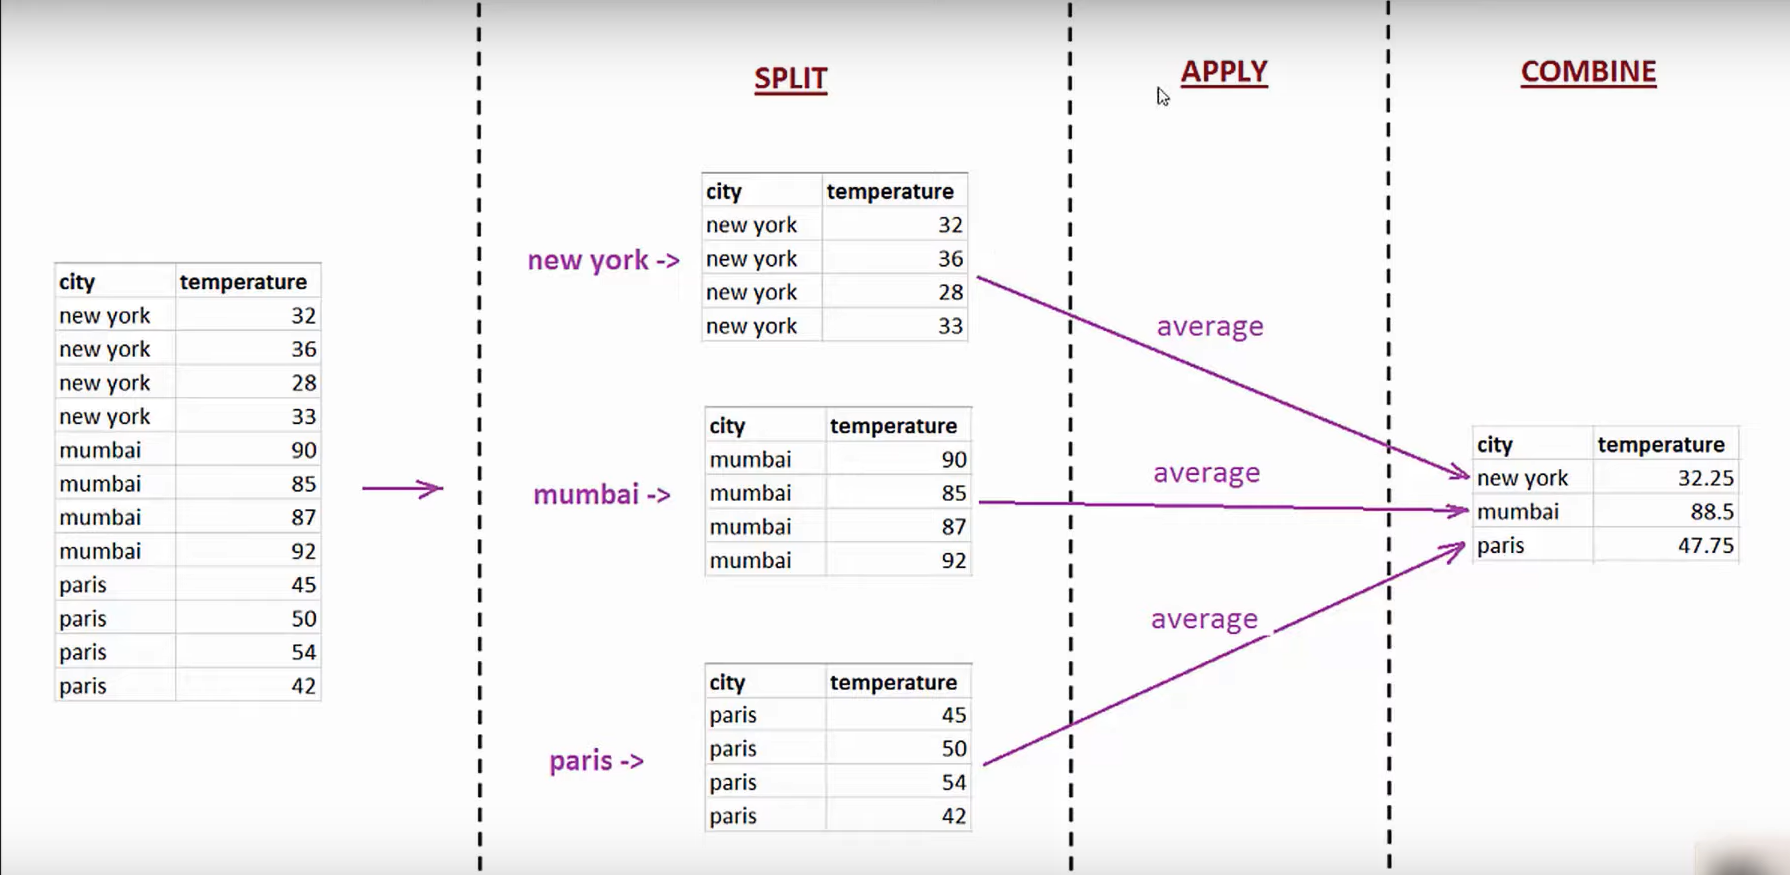

- with groupby data within dataframe will grouped by specified value.

In [40]:
# applying some methods on grouped dataframe is also know as Split Apply Combine(SAC)
# it will Split the data, Apply the specified operation and combine the results

cities_df.mean()

C:\Users\rpirt\AppData\Local\Temp\ipykernel_17552\3379723057.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cities_df.mean()


,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


In [41]:
cities_df.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

<br><br>

## *Dataframe Shaping/Reshaping*

<br><br>

### *concat()*

In [42]:
india_weather = pd.DataFrame({
    "city" : ["mumbai", "delhi", "banglore"],
    "humidity" : [80, 60, 78],
    "temperature" : [32, 45, 30]
})

india_weather

,city,humidity,temperature
0,mumbai,80,32
1,delhi,60,45
2,banglore,78,30


In [43]:
usa_weather = pd.DataFrame({
    "city" : ["new york", "chicago", "orlando"],
    "humidity" : [68, 65, 75],
    "temperature" : [21, 14, 35]
})

usa_weather

,city,humidity,temperature
0,new york,68,21
1,chicago,65,14
2,orlando,75,35


In [44]:
# concat() will return concatenated dataframes

df = pd.concat([india_weather, usa_weather])
df

,city,humidity,temperature
0,mumbai,80,32
1,delhi,60,45
2,banglore,78,30
0,new york,68,21
1,chicago,65,14
2,orlando,75,35


<br><br>

##### *ignore_index*

In [45]:
# we can see above how messed up indices are, with ignore_index we can fix it up

df = pd.concat([india_weather, usa_weather], ignore_index=True)
df

,city,humidity,temperature
0,mumbai,80,32
1,delhi,60,45
2,banglore,78,30
3,new york,68,21
4,chicago,65,14
5,orlando,75,35


<br><br>

##### *key*

In [46]:
# with the help of "key" parameter we can assign name to each added dataframes like below : 

df = pd.concat([india_weather, usa_weather], keys=["india", "usa"])
df

city  humidity  temperature
india 0    mumbai        80           32
      1     delhi        60           45
      2  banglore        78           30
usa   0  new york        68           21
      1   chicago        65           14
      2   orlando        75           35

<br><br>

##### *axis <sub>(concatenating dataframe column wise)</sub>*

In [47]:
temperature_df = pd.DataFrame({
    "city" : ["mumbai", "delhi", "banglore"],
    "windspeed" : [32, 45, 30]
})

windspeed_df = pd.DataFrame({
    "city" : ["mumbai", "delhi", "banglore"],
    "winspeed" : [7, 12, 9]
})


# whenever we concat dataframes it happens on rows wise format, but what if we have to it as column wise, we use axis parameter

df = pd.concat([temperature_df, windspeed_df], axis=1)
df

,city,windspeed,city,winspeed
0,mumbai,32,mumbai,7
1,delhi,45,delhi,12
2,banglore,30,banglore,9


<br><br>

##### *index*

In [48]:
# while working on data, its not neccessary that data with dataframes are in same format before concatenating, so we use indices to structure them

temperature_df = pd.DataFrame({
    "city" : ["mumbai", "delhi", "banglore"],
    "temperature" : [32, 45, 30]
}, index=[0,1,2])

windspeed_df = pd.DataFrame({
    "city" : ["delhi", "mumbai"],
    "windspeed" : [7, 12]
}, index=[1, 0])

df = pd.concat([temperature_df, windspeed_df], axis=1)
df

,city,temperature,city,windspeed
0,mumbai,32,mumbai,12.0
1,delhi,45,delhi,7.0
2,banglore,30,NaN,NaN


<br><br>

### *merge()*

In [49]:
df1 = pd.DataFrame({
    "city" : ["new york", "chicago", "orlando"],
    "temperature" : [21, 14, 35]
})

df2 = pd.DataFrame({
    "city" : ["chicago", "new york", "san francisco"],
    "humidity" : [65, 68, 75]
})

<br><br>

##### *how*

In [50]:
# merge() will return a new dataframe which will be the merged data based on specified column(s) (in our case it is 'city')


# inner value will merge dataframes as inner join in SQL (merges only common data along dataframes as specified by columns)
df = df1.merge(df2, how="inner", left_on="city", right_on="city")
print(f"\n\n\nInner Join\n----------------------\n")
print(df)

# outer value will merge dataframes as outer join in SQL (merges all the data together from dataframes)
df = df1.merge(df2, how="outer", left_on="city", right_on="city")
print(f"\n\n\nOuter Join\n----------------------\n")
print(df)

# left value will merge dataframes as left join in SQL (merges all the data from left dataframe with the available data in right)
df = df1.merge(df2, how="left", left_on="city", right_on="city")
print(f"\n\n\nLeft Join\n----------------------\n")
print(df)

# left value will merge dataframes as left join in SQL (merges all the data from right dataframe with the available data in left)
df = df1.merge(df2, how="right", left_on="city", right_on="city")
print(f"\n\n\nRight Join\n----------------------\n")
print(df)


# cross value will merge dataframes as cross join in SQL (merges all the data from dataframes as cartesian product)
df = df1.merge(df2, how="cross")
print(f"\n\n\nCross Join\n----------------------\n")
print(df)


# NOTE : by default "how" parameter is set to inner, which will merge only data which is common in both dataframe(s)
# NOTE : 




Inner Join
----------------------

       city  temperature  humidity
0  new york           21        68
1   chicago           14        65



Outer Join
----------------------

            city  temperature  humidity
0       new york         21.0      68.0
1        chicago         14.0      65.0
2        orlando         35.0       NaN
3  san francisco          NaN      75.0



Left Join
----------------------

       city  temperature  humidity
0  new york           21      68.0
1   chicago           14      65.0
2   orlando           35       NaN



Right Join
----------------------

            city  temperature  humidity
0        chicago         14.0        65
1       new york         21.0        68
2  san francisco          NaN        75



Cross Join
----------------------

     city_x  temperature         city_y  humidity
0  new york           21        chicago        65
1  new york           21       new york        68
2  new york           21  san francisco        75
3   ch

<br><br>
##### *indicator*

In [51]:
# indicator will help you look out for which data is from which dataframe

df = df1.merge(df2, how="outer", indicator=True)
df

,city,temperature,humidity,_merge
0,new york,21.0,68.0,both
1,chicago,14.0,65.0,both
2,orlando,35.0,NaN,left_only
3,san francisco,NaN,75.0,right_only


<br><br>
##### *suffix*

In [52]:
df1 = pd.DataFrame({
    "city" : ["new york", "chicago", "orlando", "baltimore"],
    "temperature" : [21, 14, 35, 38],
    "humidity" : [65, 68, 71, 75]
})

df2 = pd.DataFrame({
    "city" : ["chicago", "new york", "san diego"],
    "temperature" : [21, 14, 35],
    "humidity" : [65, 68, 71]
})


# if we have same column name we can use suffixes to know which column is from which dataframe after merging
df = df1.merge(df2, on="city", suffixes=("_left", "_right"))
df

,city,temperature_left,humidity_left,temperature_right,humidity_right
0,new york,21,65,14,68
1,chicago,14,68,21,65


<br><br>

### *pivot()*

In [53]:
df = pd.DataFrame({
    "date" : ["5/1/2017", "5/2/2017", "5/3/2017", "5/1/2017", "5/2/2017", "5/3/2017", "5/1/2017", "5/2/2017", "5/3/2017"],
    "city" : ["new york", "new york", "new york", "mumbai", "mumbai", "mumbai", "beijing", "beijing", "beijing"],
    "temperature" : [65, 66, 68, 75, 78, 82, 80, 77, 79],
    "humidity" : [56, 58, 60, 80, 83, 85, 26, 30, 35]
})

df["date"] = pd.to_datetime(df["date"])
df

,date,city,temperature,humidity
0,2017-05-01,new york,65,56
1,2017-05-02,new york,66,58
2,2017-05-03,new york,68,60
3,2017-05-01,mumbai,75,80
4,2017-05-02,mumbai,78,83
5,2017-05-03,mumbai,82,85
6,2017-05-01,beijing,80,26
7,2017-05-02,beijing,77,30
8,2017-05-03,beijing,79,35


In [54]:
# pivot() will format shape of dataframe as required

df.pivot_table(index="city", columns="date")

humidity                       temperature                      
date     2017-05-01 2017-05-02 2017-05-03  2017-05-01 2017-05-02 2017-05-03
city                                                                       
beijing          26         30         35          80         77         79
mumbai           80         83         85          75         78         82
new york         56         58         60          65         66         68

<br><br>

### *pivot_table()*

In [55]:
df = pd.DataFrame({
    "date" : ["5/1/2017", "5/1/2017", "5/2/2017", "5/2/2017", "5/1/2017", "5/1/2017", "5/2/2017", "5/2/2017"],
    "city" : ["new york", "new york", "new york", "new york", "mumbai", "mumbai", "mumbai", "mumbai"],
    "temperature" : [65, 61, 70, 72, 75, 78, 82, 80],
    "humidity" : [56, 54, 60, 62, 80, 83, 85, 26]
})

df["date"] = pd.to_datetime(df["date"])
df

,date,city,temperature,humidity
0,2017-05-01,new york,65,56
1,2017-05-01,new york,61,54
2,2017-05-02,new york,70,60
3,2017-05-02,new york,72,62
4,2017-05-01,mumbai,75,80
5,2017-05-01,mumbai,78,83
6,2017-05-02,mumbai,82,85
7,2017-05-02,mumbai,80,26


In [56]:
# pivot_table() will format shape of dataframe as required and also give some aggregates value(mean is default)

df.pivot_table(index="city", columns="date", aggfunc="count")

humidity            temperature           
date     2017-05-01 2017-05-02  2017-05-01 2017-05-02
city                                                 
mumbai            2          2           2          2
new york          2          2           2          2

<br><br>

### *melt()*

In [57]:
df = pd.DataFrame({
    "day" : ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    "chicago" : [32, 30, 28, 22, 30, 20, 25],
    "chennai" : [75, 77, 75, 82, 83, 81, 77],
    "berlin" : [41, 43, 45, 38, 30, 45, 47]
})

df

,day,chicago,chennai,berlin
0,Monday,32,75,41
1,Tuesday,30,77,43
2,Wednesday,28,75,45
3,Thursday,22,82,38
4,Friday,30,83,30
5,Saturday,20,81,45
6,Sunday,25,77,47


In [58]:
# melt() will unpivot dataframe

df1 = pd.melt(df, id_vars=["day"], var_name="city", value_name="temperature")
df1

,day,city,temperature
0,Monday,chicago,32
1,Tuesday,chicago,30
2,Wednesday,chicago,28
3,Thursday,chicago,22
4,Friday,chicago,30
5,Saturday,chicago,20
6,Sunday,chicago,25
7,Monday,chennai,75
8,Tuesday,chennai,77
9,Wednesday,chennai,75


<br><br>

### *stack()*

In [59]:
df = pd.read_excel("../Data/stocks.xlsx", header=[0,1], index_col=[0])
df

Price                  Price to earning ratio(P/E)         \
Company    Facebook Google Microsoft                    Facebook Google   
2017-06-05      155    955        66                       37.10   32.0   
2017-06-06      150    987        69                       36.98   31.3   
2017-06-07      153    963        62                       36.78   31.7   
2017-06-08      155   1000        61                       36.11   31.2   
2017-06-09      156   1012        66                       37.07   30.0   

                      
Company    Microsoft  
2017-06-05     30.31  
2017-06-06     30.56  
2017-06-07     30.46  
2017-06-08     30.11  
2017-06-09     31.00

In [60]:
# stack() will return dataframe with multilevel of indices converted after stacking columns to indices
# we can specify which level of column header we want to be indices (by default inner most column header will be targeted)

stack_df = df.stack(level=0)
stack_df

Company                                 Facebook  Google  Microsoft
                                                                   
2017-06-05 Price                          155.00   955.0      66.00
           Price to earning ratio(P/E)     37.10    32.0      30.31
2017-06-06 Price                          150.00   987.0      69.00
           Price to earning ratio(P/E)     36.98    31.3      30.56
2017-06-07 Price                          153.00   963.0      62.00
           Price to earning ratio(P/E)     36.78    31.7      30.46
2017-06-08 Price                          155.00  1000.0      61.00
           Price to earning ratio(P/E)     36.11    31.2      30.11
2017-06-09 Price                          156.00  1012.0      66.00
           Price to earning ratio(P/E)     37.07    30.0      31.00

<br><br>

### *unstack()*

In [61]:
# unstack() will return dataframe with is excatly opposite to stack()

stack_df.unstack()

Company    Facebook                              Google  \
              Price Price to earning ratio(P/E)   Price   
2017-06-05    155.0                       37.10   955.0   
2017-06-06    150.0                       36.98   987.0   
2017-06-07    153.0                       36.78   963.0   
2017-06-08    155.0                       36.11  1000.0   
2017-06-09    156.0                       37.07  1012.0   

Company                                Microsoft                              
           Price to earning ratio(P/E)     Price Price to earning ratio(P/E)  
2017-06-05                        32.0      66.0                       30.31  
2017-06-06                        31.3      69.0                       30.56  
2017-06-07                        31.7      62.0                       30.46  
2017-06-08                        31.2      61.0                       30.11  
2017-06-09                        30.0      66.0                       31.00